In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu, threshold_sauvola


In [12]:
IMAGE_DIR = "/kaggle/input/brain-tumor-segmentation/images"
MASK_DIR  = "/kaggle/input/brain-tumor-segmentation/masks"


In [13]:
def read_image_and_mask(filename):

    image = cv2.imread(os.path.join(IMAGE_DIR, filename), 0)  # grayscale
    mask  = cv2.imread(os.path.join(MASK_DIR, filename), 0)

    mask = (mask > 0).astype(np.uint8)  # convert to binary

    return image, mask


In [14]:
def apply_otsu(image):

    t = threshold_otsu(image)       # find threshold
    result = (image > t).astype(np.uint8)

    return result


In [15]:
def apply_sauvola(image):

    t = threshold_sauvola(image, window_size=25)
    result = (image > t).astype(np.uint8)

    return result


In [16]:
def dice(gt, pred):

    intersection = np.sum(gt * pred)
    total_pixels = np.sum(gt) + np.sum(pred)

    return (2 * intersection) / (total_pixels + 1e-5)


In [17]:
def jaccard(gt, pred):

    intersection = np.sum(gt * pred)
    union = np.sum(gt) + np.sum(pred) - intersection

    return intersection / (union + 1e-5)


In [18]:
image_files = sorted(os.listdir(IMAGE_DIR))

dice_otsu = []
dice_sauv = []

jac_otsu = []
jac_sauv = []

for filename in image_files:

    # Step 1 – Read data
    image, gt_mask = read_image_and_mask(filename)

    # Step 2 – Apply algorithms
    otsu_mask = apply_otsu(image)
    sauv_mask = apply_sauvola(image)

    # Step 3 – Compute metrics
    dice_otsu.append(dice(gt_mask, otsu_mask))
    dice_sauv.append(dice(gt_mask, sauv_mask))

    jac_otsu.append(jaccard(gt_mask, otsu_mask))
    jac_sauv.append(jaccard(gt_mask, sauv_mask))


In [19]:
print("===== FINAL RESULTS =====")

print("Otsu Dice Score     :", np.mean(dice_otsu))
print("Sauvola Dice Score  :", np.mean(dice_sauv))

print("Otsu Jaccard Score  :", np.mean(jac_otsu))
print("Sauvola Jaccard Score:", np.mean(jac_sauv))


===== FINAL RESULTS =====
Otsu Dice Score     : 0.07074164297753223
Sauvola Dice Score  : 0.046281720853312794
Otsu Jaccard Score  : 0.03764597896483037
Sauvola Jaccard Score: 0.024083547292410933


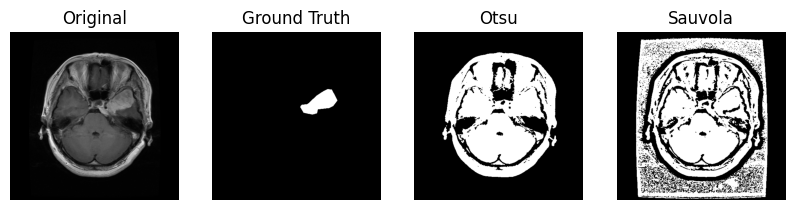

In [20]:
image, gt_mask = read_image_and_mask(image_files[0])

otsu_mask = apply_otsu(image)
sauv_mask = apply_sauvola(image)

plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gt_mask, cmap='gray')
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(otsu_mask, cmap='gray')
plt.title("Otsu")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(sauv_mask, cmap='gray')
plt.title("Sauvola")
plt.axis("off")

plt.show()
